Linear regression is a technique that measures the relationship between two variables

Python's statsmodels library has a built-in linear fit function. Note that this will give a line of best fit; whether or not the relationship it shows is significant is for you to determine. The output will also have some statistics about the model, such as R-squared and the F value, which may help you quantify how good the fit actually is.

In [4]:
# Import libraries
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
import pandas_datareader as pdr

In [5]:
data_tsla = pdr.get_data_yahoo('TSLA')
data_spy = pdr.get_data_yahoo('SPY')
def linreg(X,Y):
    # Running the linear regression
    X = sm.add_constant(X)
    model = regression.linear_model.OLS(Y, X).fit()
    a = model.params[0]
    b = model.params[1]
    X = X[:, 1]

    # Return summary of the regression and plot results
    X2 = np.linspace(X.min(), X.max(), 100)
    Y_hat = X2 * b + a
    plt.scatter(X, Y, alpha=0.3) # Plot the raw data
    plt.plot(X2, Y_hat, 'r', alpha=0.9);  # Add the regression line, colored in red
    plt.xlabel('X Value')
    plt.ylabel('Y Value')
    return model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     433.5
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           6.09e-83
Time:                        15:24:50   Log-Likelihood:                 2382.4
No. Observations:                1258   AIC:                            -4761.
Df Residuals:                    1256   BIC:                            -4751.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.001      2.022      0.043    6.22e-05       0.004
x1             1.7692      0.085     20.820      0.000       1.603       1.936
==============================================================================
Omnibus:                      216.436   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1472.681
Skew:                           0.608   Prob(JB):                         0.00
Kurtosis:                       8.159   Cond. No.                         82.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

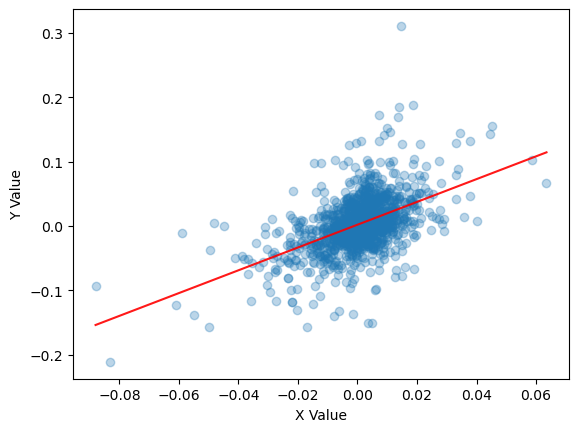

In [6]:
# We have to take the percent changes to get to returns
# Get rid of the first (0th) element because it is NAN
r_asset = data_tsla["Open"].pct_change()[1:]
r_benchmark = data_spy["Open"].pct_change()[1:]

linreg(r_benchmark.values, r_asset.values)

Each point on the above graph represents a day, with the x-coordinate being the return of SPY, and the y-coordinate being the return of TSLA. As we can see, the line of best fit tells us that for every 1% increased return we see from the SPY, we should see an extra 1.92% from TSLA. This is expressed by the parameter $\\beta$, which is 1.9271 as estimated. Of course, for decresed return we will also see about double the loss in TSLA, so we haven't gained anything, we are just more volatile.

Linear Regression vs. Correlation

Linear regression gives us a specific linear model, but is limited to cases of linear dependence.
Correlation is general to linear and non-linear dependencies, but doesn't give us an actual model.
Both are measures of covariance.
Linear regression can give us relationship between Y and many independent variables by making X multidimensional.

It is very important to keep in mind that all $\\alpha$ and $\\beta$ parameters estimated by linear regression are just that - estimates. You can never know the underlying true parameters unless you know the physical process producing the data. The parameters you estimate today may not be the same analysis done including tomorrow's data, and the underlying true parameters may be moving. As such it is very important when doing actual analysis to pay attention to the standard error of the parameter estimates. More material on the standard error will be presented in a later lecture. One way to get a sense of how stable your parameter estimates are is to estimate them using a rolling window of data and see how much variance there is in the estimates.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.02476
Date:                Sat, 10 Sep 2022   Prob (F-statistic):              0.875
Time:                        15:27:06   Log-Likelihood:                -19.378
No. Observations:                 100   AIC:                             42.76
Df Residuals:                      98   BIC:                             47.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5117      0.060      8.477      0.000       0.392       0.631
x1            -0.0172      0.109     -0.157      0.875      -0.233       0.199
==============================================================================
Omnibus:                       35.691   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.164
Skew:                          -0.047   Prob(JB):                       0.0459
Kurtosis:                       1.787   Cond. No.                         4.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

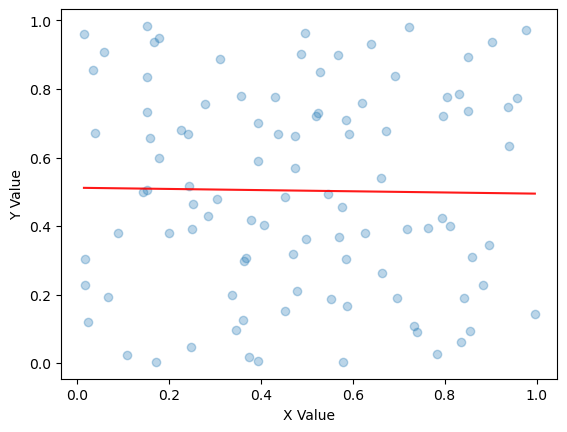

In [7]:
X = np.random.rand(100)
Y = np.random.rand(100)
linreg(X, Y)

The above shows a fairly uniform cloud of points. It is important to note that even with 100 samples, the line has a visible slope due to random chance. This is why it is crucial that you use statistical tests and not visualizations to verify your results.

Now let's make Y dependent on X plus some random noise.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     179.6
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           6.98e-24
Time:                        15:28:01   Log-Likelihood:                 18.650
No. Observations:                 100   AIC:                            -33.30
Df Residuals:                      98   BIC:                            -28.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0333      0.041     -0.807      0.421      -0.115       0.049
x1             0.9985      0.075     13.400      0.000       0.851       1.146
==============================================================================
Omnibus:                        0.431   Durbin-Watson:                   2.180
Prob(Omnibus):                  0.806   Jarque-Bera (JB):                0.508
Skew:                           0.150   Prob(JB):                        0.776
Kurtosis:                       2.820   Cond. No.                         4.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

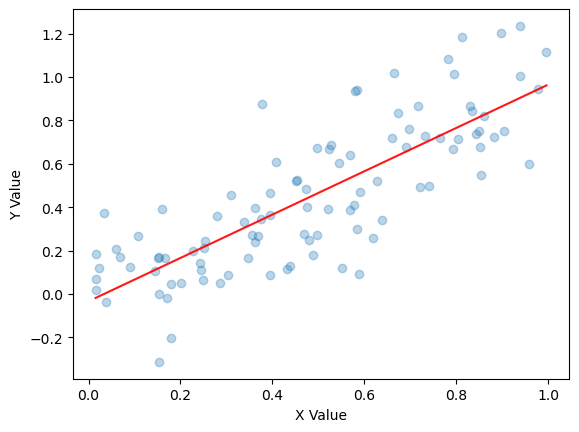

In [8]:
# Generate ys correlated with xs by adding normally-destributed errors
Y = X + 0.2*np.random.randn(100)

linreg(X,Y)

In a situation like the above, the line of best fit does indeed model the dependent variable Y quite well (with a high
 value).

Evaluating and reporting results

The independent variable is not random.
The variance of the error term is constant across observations. This is important for evaluating the goodness of the fit.
The errors are not autocorrelated. The Durbin-Watson statistic detects this; if it is close to 2, there is no autocorrelation.
The errors are normally distributed. If this does not hold, we cannot use some of the statistics, such as the F-test.

If we confirm that the necessary assumptions of the regression model are satisfied, we can safely use the statistics reported to analyze the fit. For example, the $R^2$ value tells us the fraction of the total variation of $Y$ that is explained by the model.

When making a prediction based on the model, it's useful to report not only a single value but a confidence interval. The linear regression reports 95% confidence intervals for the regression parameters, and we can visualize what this means using the `seaborn` library, which plots the regression line and highlights the 95% (by default) confidence interval for the regression line:


C:\Users\ncroc\anaconda3\envs\untitled\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


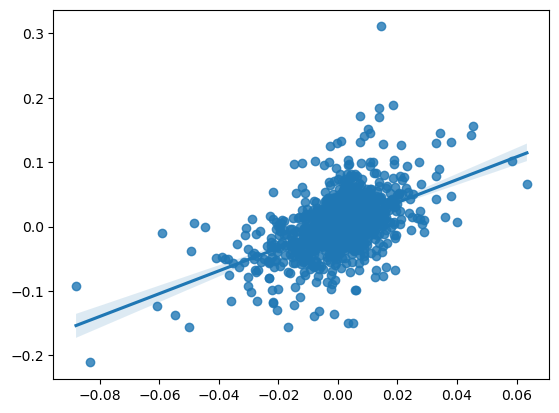

In [10]:
import seaborn

seaborn.regplot(r_benchmark.values, r_asset.values);

Mathematical Background

## Ordinary Least Squares

Regression works by optimizing the placement of the line of best fit (or plane in higher dimensions). It does so by defining how bad the fit is using an objective function. In ordinary least squares regression (OLS), what we use here, the objective function is:

$$\\sum_{i=1}^n (Y_i - a - bX_i)^2$$

We use $a$ and $b$ to represent the potential candidates for $\\alpha$ and $\\beta$. What this objective function means is that for each point on the line of best fit we compare it with the real point and take the square of the difference. This function will decrease as we get better parameter estimates. Regression is a simple case of numerical optimization that has a closed form solution and does not need any optimizer. We just find the results that minimize the objective function.

We will denote the eventual model that results from minimizing our objective function as:

$$ \\hat{Y} = \\hat{\\alpha} + \\hat{\\beta}X $$

With $\\hat{\\alpha}$ and $\\hat{\\beta}$ being the chosen estimates for the parameters that we use for prediction and $\\hat{Y}$ being the predicted values of $Y$ given the estimates

## Standard Error

We can also find the standard error of estimate, which measures the standard deviation of the error term $\\epsilon$, by getting the `scale` parameter of the model returned by the regression and taking its square root. The formula for standard error of estimate is

$$ s = \\left( \\frac{\\sum_{i=1}^n \\epsilon_i^2}{n-2} \\right)^{1/2} $$

If $\\hat{\\alpha}$ and $\\hat{\\beta}$ were the true parameters ($\\hat{\\alpha} = \\alpha$ and $\\hat{\\beta} = \\beta$), we could represent the error for a particular predicted value of $Y$ as $s^2$ for all values of $X_i$. We could simply square the difference $(Y - \\hat{Y})$ to get the variance because $\\hat{Y}$ incorporates no error in the parameter estimates themselves. Because $\\hat{\\alpha}$ and $\\hat{\\beta}$ are merely estimates in our construction of the model of $Y$, any predicted values , $\\hat{Y}$, will have their own standard error based on the distribution of the $X$ terms that we plug into the model. This forecast error is represented by the following:

$$ s_f^2 = s^2 \\left( 1 + \\frac{1}{n} + \\frac{(X - \\mu_X)^2}{(n-1)\\sigma_X^2} \\right) $$

where $\\mu_X$ is the mean of our observations of $X$ and $\\sigma_X$ is the standard deviation of $X$. This adjustment to $s^2$ incorporates the uncertainty in our parameter estimates. Then the 95% confidence interval for the prediction is $\\hat{Y} \\pm t_cs_f$, where $t_c$ is the critical value of the t-statistic for $n$ samples and a desired 95% confidence.